In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
! git clone https://github.com/justinslud/scrape-wikipedia-current-events.git

Cloning into 'scrape-wikipedia-current-events'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 18), reused 34 (delta 9), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [4]:
headlines = pd.read_csv('scrape-wikipedia-current-events/data/1995-2017clean.csv')

In [5]:
X, y = headlines['text'], headlines['year']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Predict Year

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
logreg = LogisticRegression()

In [9]:
p = make_pipeline(vectorizer, logreg)

In [10]:
p.fit(X_train, y_train)
y_pred = p.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

        1995       0.00      0.00      0.00        55
        1996       0.00      0.00      0.00        68
        1997       1.00      0.03      0.05        36
        1998       0.00      0.00      0.00        29
        1999       0.00      0.00      0.00        49
        2000       1.00      0.02      0.04        45
        2001       0.92      0.37      0.53        62
        2002       1.00      0.07      0.13        85
        2003       0.39      0.20      0.26       366
        2004       0.44      0.31      0.37       665
        2005       0.35      0.34      0.35       800
        2006       0.43      0.25      0.31       676
        2007       0.34      0.38      0.36       836
        2008       0.47      0.36      0.41       634
        2009       0.32      0.36      0.34       903
        2010       0.31      0.67      0.42      1440
        2011       0.55      0.47      0.51       763
        2012       0.44    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
confusion = confusion_matrix(y_test, y_pred)

In [12]:
years=list(range(1995, 2018))

In [13]:
pd.DataFrame(confusion, index=years, columns=years)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1995,0,0,0,0,0,0,0,0,1,1,4,0,3,1,16,15,2,2,0,0,3,5,2
1996,0,0,0,0,0,0,0,0,2,2,7,1,7,3,10,28,0,2,1,0,1,3,1
1997,0,0,1,0,0,0,0,0,1,2,3,0,5,0,10,11,2,0,0,0,1,0,0
1998,0,0,0,0,0,0,0,0,2,1,3,3,3,0,6,8,1,0,0,0,0,2,0
1999,0,0,0,0,0,0,0,0,0,0,4,1,5,3,5,20,5,1,0,1,0,3,1
2000,0,0,0,0,0,1,0,0,0,4,1,1,2,0,6,18,2,2,0,0,2,4,2
2001,0,0,0,0,0,0,23,0,3,2,8,0,4,3,4,10,1,1,0,0,1,1,1
2002,0,0,0,0,0,0,0,6,4,7,11,4,5,3,7,23,1,1,1,0,2,8,2
2003,0,0,0,0,0,0,0,0,73,38,34,12,22,9,22,90,4,8,0,0,10,32,12
2004,0,0,0,0,0,0,0,0,35,208,91,18,39,12,36,131,16,5,4,0,19,40,11


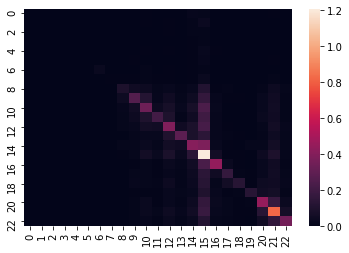

In [14]:
sns.heatmap(confusion/800)

In [15]:
report = classification_report(y_test, y_pred, output_dict=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
x = list(report.keys())[:-3]
y = [value['precision'] for key, value in list(report.items())[:-3]]

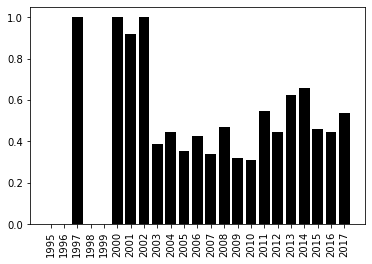

In [22]:
plt.bar(x, y, color='k')
plt.xticks(rotation=90)
plt.show()

In [27]:
list(np.where(y_pred == 2011)[0][:5])

[14, 43, 59, 70, 81]

In [28]:
X[_].values

array(['The flood in Germany turns out to be less severe than expected in the last few days. Exception is Wertheim am Main, where a 100-year-high is expected.',
       'The Indian government had to shamefully withdraw its case against Iftikhar Gilani to prevent itself from a rather piquant situation where two of its ministries would have given contradictory opinions. Gilani had been arrested under the Official Secrets Act 1923.',
       'A mass mobilization pulls together global protests against the Iraq war in cities around the world, including Tokyo, Moscow, Paris, London, Montreal, Ottawa, Toronto, Cologne, Bonn, Gothenburg, Istanbul and Cairo. NION and ANSWER hold protests in Washington, D.C. and San Francisco, California.',
       "Elections for the House of Representatives, the lower house of parliament of the Netherlands. The Dutch Labour Party wins, but Christian Democratic Appeal (CDA) remains the largest party in parliament. Pim Fortuyn List loses. CDA and People's Party for 

# Predict Subject

In [29]:
headlines['subject'].value_counts()[:9]

armed conflicts            8064
politics                   4119
disasters                  3599
international relations    3037
law                        2861
sports                     1681
business                   1562
art and culture            1200
science                     856
Name: subject, dtype: int64

In [30]:
top_subjects = headlines['subject'].value_counts()[:9].index

In [31]:
top_subjects

Index(['armed conflicts', 'politics', 'disasters', 'international relations',
       'law', 'sports', 'business', 'art and culture', 'science'],
      dtype='object')

In [32]:
top_subjects_headlines = headlines[headlines.subject.isin(top_subjects)]
X, y = top_subjects_headlines['text'], top_subjects_headlines['subject']

In [33]:
def stratified_sample(df, col, groups, min):
    dfs = []

    for group in groups:
        dfs.append(df[df[col] == group].sample(min))

    return pd.concat(dfs)

In [34]:
stratified_subject= stratified_sample(headlines, 'subject', top_subjects, 800)
stratified_subject['subject'].value_counts()

disasters                  800
politics                   800
business                   800
law                        800
international relations    800
armed conflicts            800
sports                     800
art and culture            800
science                    800
Name: subject, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(stratified_subject['text'], stratified_subject['subject'], test_size=.2)

In [37]:
vectorizer = TfidfVectorizer(stop_words='english')
logreg = LogisticRegression(max_iter=1000)

p = make_pipeline(vectorizer, logreg)

p.fit(X_train, y_train)
y_pred = p.predict(X_test)

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

        armed conflicts       0.86      0.79      0.82       171
        art and culture       0.73      0.75      0.74       144
               business       0.78      0.76      0.77       152
              disasters       0.86      0.86      0.86       166
international relations       0.72      0.79      0.76       159
                    law       0.71      0.71      0.71       161
               politics       0.76      0.76      0.76       156
                science       0.85      0.84      0.84       165
                 sports       0.92      0.94      0.93       166

               accuracy                           0.80      1440
              macro avg       0.80      0.80      0.80      1440
           weighted avg       0.80      0.80      0.80      1440



In [38]:
y_pred = p.predict(X_test)
classification_report(y_test, y_pred)

'                         precision    recall  f1-score   support\n\n        armed conflicts       0.86      0.79      0.82       171\n        art and culture       0.73      0.75      0.74       144\n               business       0.78      0.76      0.77       152\n              disasters       0.86      0.86      0.86       166\ninternational relations       0.72      0.79      0.76       159\n                    law       0.71      0.71      0.71       161\n               politics       0.76      0.76      0.76       156\n                science       0.85      0.84      0.84       165\n                 sports       0.92      0.94      0.93       166\n\n               accuracy                           0.80      1440\n              macro avg       0.80      0.80      0.80      1440\n           weighted avg       0.80      0.80      0.80      1440\n'

In [39]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=list(top_subjects), columns=list(top_subjects))

,armed conflicts,politics,disasters,international relations,law,sports,business,art and culture,science
armed conflicts,135,5,2,4,12,8,5,0,0
politics,0,108,3,3,4,7,5,8,6
disasters,1,5,115,3,10,4,9,5,0
international relations,2,1,5,142,3,1,2,8,2
law,7,2,6,2,126,10,5,1,0
sports,4,13,3,4,8,115,10,1,3
business,6,2,5,3,8,12,118,1,1
art and culture,1,8,7,4,3,2,1,138,1
science,1,4,1,1,0,2,1,0,156


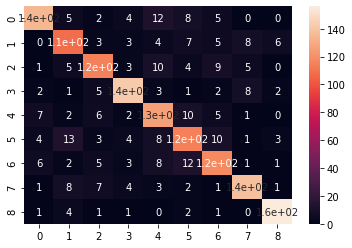

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [41]:
p.predict(['tesla produced 1000 electric vehicles and introduced a car at $35000'])

array(['business'], dtype=object)

In [42]:
probs = p.predict_proba(['tesla produced 1000 electric vehicles and introduced a car at $35000'])

In [43]:
pd.Series(probs[0], sorted(top_subjects))

armed conflicts            0.099305
art and culture            0.103231
business                   0.204733
disasters                  0.109225
international relations    0.071796
law                        0.123293
politics                   0.065604
science                    0.137156
sports                     0.085658
dtype: float64